In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [22]:
class BinaryBandit(object):
  def __init__(self, probs):
    self.N=2
    self.probs = probs
  def actions(self):
    return [0,1]
  def reward(self, action):
    actionProb = self.probs[action]
    if random.random()<actionProb:
      return 1
    else:
      return 0
binaryBanditOne = BinaryBandit([0.1, 0.2])
binaryBanditTwo = BinaryBandit([0.8, 0.9])

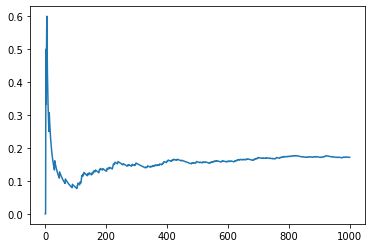

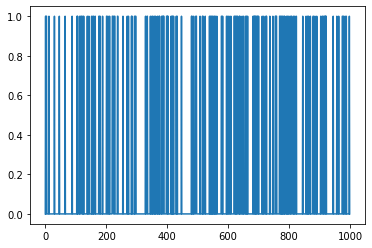

0.17200000000000013


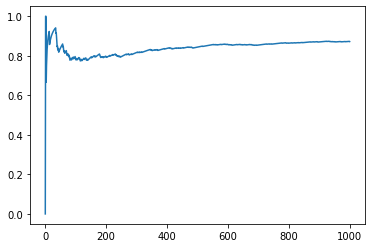

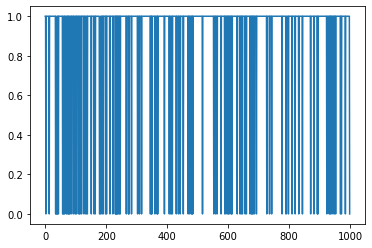

0.8720000000000007
yay


In [30]:
a1 = agent(binaryBanditOne)
a2 = agent(binaryBanditTwo)
# WE HAVE CREATED E GREEDY ALGO BELOW SO MAKE SURE TO EXECUTE THAT FIRST
_q, R_avg, _R = a1.eGreedy(0.1, 1000)
print(R_avg[-1])
_q, R_avg, _R = a2.eGreedy(0.1, 1000)
print(R_avg[-1])
print('yay')

In [17]:
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    expRewards = []
    for i in range(0,self.N):
      n = random.randint(1,3*N)
      expRewards.append(n)
    self.expRewards = expRewards
  def actions(self):
    result = []
    for i in range(0,self.N):
      result.append(i)
    return result
  def reward(self, action):
    result = []
    n = random.gauss(0,8)
    result = self.expRewards[action] + n
    return result

In [19]:
# helper function for graphs
def showGraphs(R, R_avg):
  plt.plot(R_avg)
  plt.show()
  plt.plot(R)
  plt.show()

In [ ]:
myBandit.actions()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

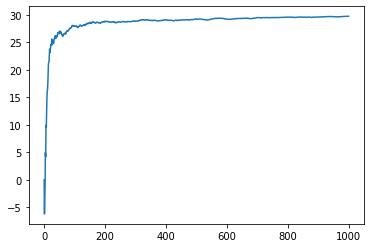

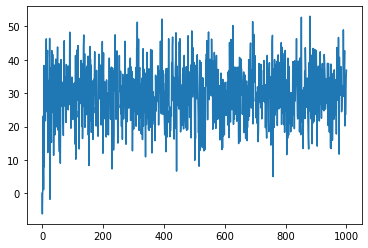

0.1  =>   29.72723198060609


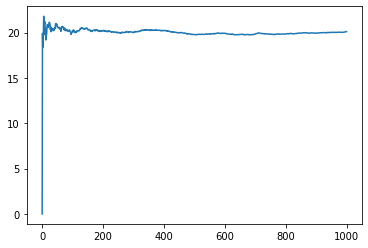

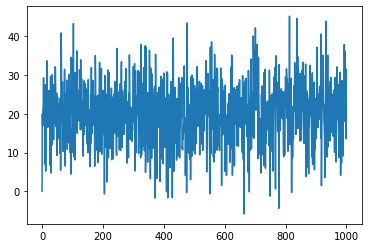

0.5  =>   20.10145396601485


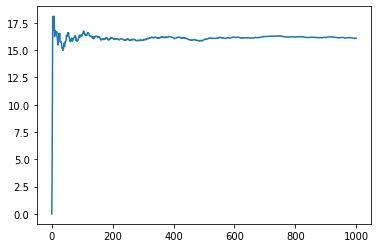

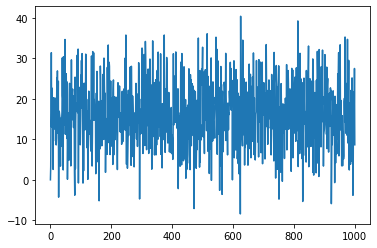

0.7  =>   16.095114481434837
yay


In [20]:
# e-greedy, Optimistic Intial Start, UCB, Gradient Bandit Algorithm

class agent(object):
  def __init__(self, myBandit):
    self.myBandit = myBandit
  def eGreedy(self, epsilon, max_iteration):
    N = self.myBandit.N
    actions = self.myBandit.actions
    reward = self.myBandit.reward
    Q = [0]*N 
    count = [0]*N
    r = 0
    # will contain rewards we find each time
    R = []
    R_avg = [0]
    _actions = actions()

    # Incremental Implementation
    for iter in range(1, max_iteration + 1):
      if random.random() > epsilon:
        # Exploit/ Greed
        action = Q.index(max(Q))
      else:
        # Explore
        action = random.choice(_actions)
    
      r = reward(action)
      R.append(r)
      count[action] = count[action] + 1
      # updating action
      Q[action] = Q[action] + (r - Q[action])/count[action]
      # new average = ((last average * count-1) + new value) / count 
      """
      (last average * count-1) => basically sum of previous values
      so new sum = oldsum + new value
      avg = new sum / count
      """
      R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    showGraphs(R, R_avg)
    return Q, R_avg, R

  # UPPER CONFIDENCE BOUND
  def UCB(self, c, max_iteration): 
    N = self.myBandit.N
    _actions = self.myBandit.actions()
    reward = self.myBandit.reward
    Q = [] 
     # we are basically running once so count = 1 for now, we can change average as well but lets forget that for now
    count = np.ones(N)
    r = 0
    # will contain rewards we find each time
    R = []
    R_avg = [0]
    maxAt = 0
    """
    playing all arms once to get the values of Q initially
    """
    for i in range(N):
      Q.append(reward(i))
    # print(Q)
    """
    basically we'll try to find
    Q[A] + c*root(2*log(N)/nA)
    here N => total count(iterations)
    nA => no of counts A came

    so we'll take max of Q[A], Q[B]....
    and try that move

    observation:
    so as we try to play one arm again and again the additional value will be going toward zero so other arms with similar reward may take part as well
    second term is BOUND
    so as we play one arm again and again the BOUND will be minimal
    in different words, we'll say we are mostly sure about the reward of that arm as we played a lot of times
    """
    for iter in range(1, max_iteration + 1):
      Z = Q + c * (2 * np.log(iter) / count)**0.5
      id = Z.argmax()
      # max = Z[id]
      r = reward(id)
      count[id] = count[id] + 1
      R.append(r)
      R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    showGraphs(R, R_avg)
    return Q, R_avg, R

  def GBA(self, alpha, max_iteration): 
    N = self.myBandit.N
    _actions = self.myBandit.actions()
    reward = self.myBandit.reward
    H = np.zeros(N)
    Q = [] 
    r = 0
    # will contain rewards we find each time
    R = [0]
    R_avg = [0]
    maxAt = 0
    _choices = []
    # for i in range(N):
    #   Q.append(reward(i))
    for i in range(1, max_iteration+1):
      prAt = np.exp(H)/np.sum(np.exp(H))
      [id] = random.choices(_actions, prAt)
      _choices.append(id)
      r = reward(id)
      R.append(r)
      R_avg.append(R_avg[i-1] + (r-R_avg[i-1])/i)
      for j in range(len(H)):
        if j == id:
          H[j] = H[j] + alpha*(R[i] - R_avg[i])*(1-prAt[j])
        else:
          H[j] = H[j] - alpha*(R[i] - R_avg[i])*prAt[j]
    # plt.scatter(list(range(max_iteration)), _choices)
    # plt.show()
    showGraphs(R, R_avg)
    print(alpha, ' =>  ', R_avg[max_iteration-1])
    return Q, R_avg, R
myBandit = Bandit(N=10)
# print(myBandit.expRewards)
z = agent(myBandit)
z.GBA(0.1, 1000)
z.GBA(0.5, 1000)
z.GBA(0.7, 1000)
# print('E GREEDY')
# z.eGreedy(0.1, 1000)
# print('UPPER CONFIDENCE BOUND')
# z.UCB(2, 1000)
# z.UCB(10, 1000)
print('yay')